# Plantão - Introdução a Ciências de Dados
## Aula 3 - Tratamento e Transformação de Dados
#### Professor: Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
#### Tutor (terça-feira): [Jadson Oliveira](https://www.linkedin.com/in/jadsonjjmo/)
#### Tutor (quinta-feira): Fernando
#### Universidade de São Paulo, São Carlos, Brasil.<br>
Copyright (c) 2022.


In [ ]:
# importando bibliotecas que serão utilizadas
# é uma boa pratica de programação importa-las 
# no inicio e não no meio do código

import random # gerador de números aleatórios
import numpy as np # biblioteca Numpy para manipulação de Matrizes
import pandas as pd # biblioteca Pandas é usada para manipulação de Tabelas
import matplotlib.pyplot as plt # biblioteca para visualização dos dados

from sklearn.preprocessing import StandardScaler # modulo para padronizar os dados
from sklearn.preprocessing import MinMaxScaler # modulo para normalizar os dados
from sklearn.decomposition import PCA # modulo para aplicar PCA nos dados

random.seed(1) # inicia a semente do gerador de números aleatórios. Importante para reprodução dos resultados

## 1 - Leia os dados com erro novamente (iris-with-errors), faça a limpeza e remova as duas últimas colunas.

In [ ]:
# CSV file
data = pd.read_csv('data/iris-with-errors.csv') # leitura do arquivo csv

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada


In [ ]:
# LIMPEZA DO DADOS

## Remover valores nulos
data = data.replace('?', np.nan) # substitui '?' por valores nulos
data = data.dropna() # remove os valores nulos

## Remover as linhas duplicadas
data = data.drop_duplicates()

# Remover as duas últimas colunas
data = data.drop(data.columns[-2:], axis=1)

In [ ]:
data.head() # mostra os primeiros cinco elementos

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
3,4.7,3.2,1.3
6,5,3.6,1.4
7,5.4,3.9,1.7
10,5,3.4,1.5


## 2 - Leia os dados com erro novamente e insira a mediana de cada atributo onde for encontrada NaN.

In [ ]:
# CSV file
df = pd.read_csv('data/iris-with-errors.csv') # leitura do arquivo csv

data = df.iloc[:,:-1] # separando os dados, removendo a ultima coluna (target)

data = data.replace('?', np.nan) # substitui '?' por valores nulos

data.dtypes # vamos ver os tipos de cada coluna.

sepal_length     object
sepal_width      object
petal_length    float64
petal_width      object
dtype: object

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,5.1,3.5,1.4,0.2
2,NaN,3,1.4,0.2
3,4.7,3.2,1.3,0.2
4,5.1,3.5,1.4,0.2


In [ ]:
# podemos observar que alguns são colunas de objetos (strings, apesar de serem valores numericos). 
# Vamos mudar isso transformando os valores string em numericos
data = data.apply(pd.to_numeric) 

# agora, vamos verificar os novos tipos das colunas
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [ ]:
# agora que temos os arquivos como valores numéricos, podemos aplicar a mediana. 
# Repare que na linha de indice 2, muda o valor nulo para a mediana da coluna
data = data.fillna(data.median())
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.10,3.5,1.4,0.2
1,5.10,3.5,1.4,0.2
2,5.05,3.0,1.4,0.2
3,4.70,3.2,1.3,0.2
4,5.10,3.5,1.4,0.2


## 3 - Reamostre os dados da Iris e selecione 10 elementos em cada classe.

In [ ]:
# vamos usar o nosso dataframe inicial, antes de fazer qualquer alteraçao
# primeiro, criamos um dataframe vazio para nossa resposta
df_resample = pd.DataFrame(columns=df.columns)

# definimos o numero de elementos
n = 10 

# criamos um vetor com todas as possiveis especies.
# df['species'] acessa a coluna "species" e unique() retorna os valores unicos dessa coluna
targets = list(df['species'].unique())

# para cada um dos targets, faremos:
for t in targets:
    df_aux = df.loc[df["species"] == t]                 # filtramos pela classe
    df_aux = df_aux.sample(n, replace=True)             # usamos a funcao sample que retorna um sample aleatorio. replace é necessário pois estamos repetindo amostras.
    df_resample = pd.concat([df_resample, df_aux])      # concatenamos com nosso dataframe resultad

In [ ]:
# Note que temos a mesma quantidade de elementos para ambas das classes
df_resample

,sepal_length,sepal_width,petal_length,petal_width,species
8,5.4,3.9,1.7,0.4,duplicada
1,5.1,3.5,1.4,0.2,duplicada
0,5.1,3.5,1.4,0.2,duplicada
7,5.4,3.9,1.7,0.4,duplicada
14,4.4,2.9,1.4,0.2,duplicada
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
4,5.1,3.5,1.4,0.2,duplicada
17,4.4,2.9,1.4,0.2,duplicada
7,5.4,3.9,1.7,0.4,duplicada


## 4 - Realize o PCA nos dados da Vehicles.

In [ ]:
vehicles = pd.read_csv('data/Vehicle.csv')

In [ ]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Comp          846 non-null    int64 
 1   Circ          846 non-null    int64 
 2   D.Circ        846 non-null    int64 
 3   Rad.Ra        846 non-null    int64 
 4   Pr.Axis.Ra    846 non-null    int64 
 5   Max.L.Ra      846 non-null    int64 
 6   Scat.Ra       846 non-null    int64 
 7   Elong         846 non-null    int64 
 8   Pr.Axis.Rect  846 non-null    int64 
 9   Max.L.Rect    846 non-null    int64 
 10  Sc.Var.Maxis  846 non-null    int64 
 11  Sc.Var.maxis  846 non-null    int64 
 12  Ra.Gyr        846 non-null    int64 
 13  Skew.Maxis    846 non-null    int64 
 14  Skew.maxis    846 non-null    int64 
 15  Kurt.maxis    846 non-null    int64 
 16  Kurt.Maxis    846 non-null    int64 
 17  Holl.Ra       846 non-null    int64 
 18  Class         846 non-null    object
dtypes: int64

In [ ]:
# Capturando e removendo o atributo classes do conjunto de dados
classes = vehicles.iloc[:,-1]

# Exibindo a lista de classes do conjunto de dados
print(np.unique(classes))

# Removendo o atributo classe do conjunto de dados
vehicles = vehicles.iloc[:,:-1]

['bus' 'opel' 'saab' 'van']


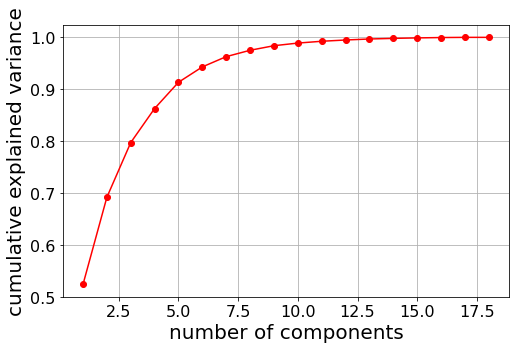

In [ ]:
# Como temos 19 variaveis, podemos reduzir a dimensionalidade para qualquer valor abaixo disso
# Portanto, criamos uma lista com todas possibilidades para analizarmos qual é o minimo
# dimensoes que podemos reduzir ainda sendo possivel explicar sua variancia
n_components_values = np.arange(1, len(vehicles.columns) + 1)

# Vamos padronizar os dados, de modo a evitar o efeito da escala dos atributos.
scaler = StandardScaler().fit(vehicles)
vehicles_transformed = scaler.transform(vehicles)

# instanciamos o PCA sem especificar o numero de componentes que desejamos
# em seguida ajustamos ao nosso conjunto de dados
pca = PCA().fit(vehicles_transformed)

# mostra a variância acumulada para todos os possiveis numeros de componentes
# Notamos que com apenas duas variaveis conseguimos explicar 95% da variancia dos dados
plt.figure(figsize=(8, 5))
plt.plot(n_components_values, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=16)
plt.yticks(color='k', size=16)
plt.grid(True)
plt.show(True)